In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class GD():
  def __init__(self, A, x_0, t, m_1, alpha, epsilon):
    self.A = A
    self.x_0 = x_0
    self.t = t
    self.m_1 = m_1
    self.alpha = alpha
    self.epsilon = epsilon

  def func(self, x):
    return np.sum(x**2) + x[-1]**2

  def grad(self, x):
    return np.array([2*x[0], 4*x[1]])

  def GD_const(self):
    history = []
    x = self.x_0
    history.append(self.func(x))

    while np.sqrt(np.sum(x**2)) >= self.epsilon:
      x = x - self.t* self.grad(x)
      history.append(self.func(x))
    return history

  def GD_exact_line_search(self):
    history = []
    x  = self.x_0
    history.append(self.func(x))

    while np.sqrt(np.sum(x**2)) >= self.epsilon:
      d = -self.grad(x)
      t = -(d.T@self.A@x)/(d.T@self.A@d)
      x = x + t* d
      history.append(self.func(x))
    return history

  def GD_backtracking(self):
    history = []
    x = self.x_0
    history.append(self.func(x))

    while np.sqrt(np.sum(x**2)) >= self.epsilon:
      t = 1
      d = -self.grad(x)
      while self.func(x + t*d) - self.func(x) >= -self.m_1*t*np.sum(self.grad(x)**2):
        t = self.alpha*t
      x = x + t*d
      history.append(self.func(x))
    return history

In [ ]:
gd = GD(
    A = np.array([[2, 0], [0, 4]]),
    x_0 = np.array([2, 1]),
    t = 0.1,
    m_1 = 0.5,
    alpha = 0.5,
    epsilon = 1e-5)

history_const = gd.GD_const()
history_els = gd.GD_exact_line_search()
history_backtrack = gd.GD_backtracking()

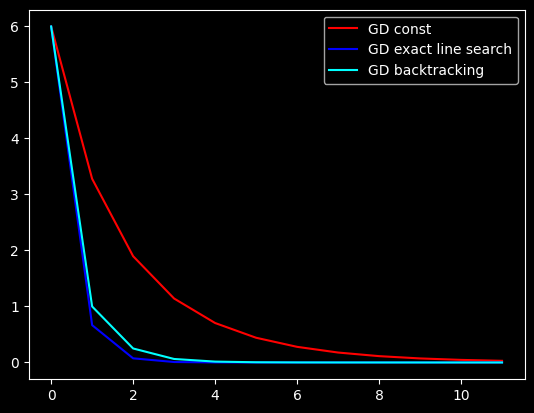

In [ ]:
plt.style.use("dark_background")
plt.plot(history_const[:12], color = "red", label = "GD const")
plt.plot(history_els[:12], color = "blue", label = "GD exact line search")
plt.plot(history_backtrack[:12], color = "cyan", label = "GD backtracking")
plt.legend();